# Práctica Final

Enhorabuena!!! Ya el haber llegado hasta aquí es un logro más en tu camino para ser un experto del Big Data y del Machine Learning!! 


<img src="./Images/happy.gif" alt="Drawing" style="width: 300px;"/>

Con esta práctica pondremos en valor todo lo que hemos visto a lo largo del módulo. Vamos allá!! 😄

## 1. ¿Cuánto cuesta hacer una cerveza?

Este ejercicio pondrá a prueba tu habilidad resolver un problema usando vectores.

**Objetivos**:
- Usar `Python`
- Asegurar los fundamentos matemáticos detrás de las operaciones con vectores.

**Problema**: Determinar el precio de la cerveza en base a sus ingredientes.

**Datos:**

Considerando que los ingredientes de la cerveza son:<br>
`ingredientes = {lúpulo, malta, agua, levadura}`

Por otro lado tenemos el vector coste:<br>
`coste = {lúpulo: 2.5, malta: 1.5, agua: 0.006, levadura: 0,45}`

Por último tenemos el vector cantidad con lo necesario para hacer una cerveza:<br>
`cantidad = {lúpulo: 6u, malta: 14u, agua: 7u, levadura: 11u}`

In [1]:
### TODO: Crear una función para determinar el precio de la cerveza en base a sus ingregientes
### Contruye una función que toma como input 3 diccionarios: coste, cantidad e ingredientes
### Devuelve el precio de la cerveza
### TU RESPUESTA ABAJO

def precio_cerveza(coste, cantidad, ingredientes):
    precio = 0
    for ingrediente in ingredientes:
        precio += coste[ingrediente]*cantidad[ingrediente]
    
    return precio

ingredientes = {'lupulo', 'malta', 'agua', 'levadura'}
coste = {'lupulo': 2.5, 'malta': 1.5, 'agua': 0.006, 'levadura': 0.45}
cantidad = {'lupulo': 6, 'agua': 7, 'malta': 14, 'levadura': 11}
precio_cerveza(coste, cantidad, ingredientes)

40.992000000000004

## 2. Singular Value Decomposition

Este ejercicio pondrá a prueba tu habilidad para usar Singular Value Decomposition para comprimir una imagen.

**Objetivos**
- Usar `Python`
- Entender los fundamentos de `SVD`.

**Problema:** Usar `SVD` para comprimir una imagen en blanco y negro.

La imagen que deberas usar es la siguiente:

In [2]:
!pip install scipy
!pip install matplotlib

You should consider upgrading via the 'C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


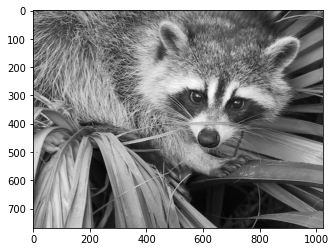

In [3]:
import matplotlib.pyplot as plt
from scipy import misc
%matplotlib inline

# Load image
A = misc.face(gray=True)

plt.imshow(A, cmap=plt.cm.gray)

Deberas crear tu propia función para calcular el error de reconstrucción, que viene definido por:

$$SSE =  \sum_{n}^{i=1}  \begin{Vmatrix}x_{i} -  \widehat{x}_i \end{Vmatrix} ^2 $$

Donde:

- $x_i$ son los valores de la matriz original X
- $\widehat{x}_i$ son los valores de la matriz reconstruida

In [4]:
### TODO: Función para calcular el error de reconstrucción
### TU RESPUESTA ABAJO

import numpy as np

def sse_score(X, X_hat):
    sse = np.sum((X - X_hat)**2)
    return sse

X = np.array([[1, 2], [3, 4]])
X_hat = np.array([[1.01, 1.75], [2.81, 3.99]])
sse_score(X, X_hat)

0.09879999999999997

Una vez que ya tenemos la función `sse` hecha, podemos pasar a construir la función que ejecutará `SVM`.

In [5]:
### TODO: Función para ejecutar SVM
### Tiene como entrada una matriz X
### Devuelve U, s, Vt

### Hint: S debe ser una matriz diagonal
### TU RESPUESTA ABAJO

def svm(X):
    U, s, Vt = np.linalg.svd(X, full_matrices=False)
    S = np.diag(s)
    return (U, S, Vt)

X = np.array([[1, 2], [3, 4]])
U, S, Vt = svm(X)
               
print(U)
print(S)
print(Vt)

[[-0.40455358 -0.9145143 ]
 [-0.9145143   0.40455358]]
[[5.4649857  0.        ]
 [0.         0.36596619]]
[[-0.57604844 -0.81741556]
 [ 0.81741556 -0.57604844]]


Como hemos visto en clase, las matrices obtenidas a partir de `SVM` nos sirven para reconstruir la matriz original `X`. Para ello, construye una función que permita reconstruir la matriz original `X` a partir de `U, s, Vt`.

In [6]:
### TODO: Función para reconstruir la matriz original a partir de U, s, Vt
### Tiene como entrada U, s, Vt
### Devuelve X_hat
### TU RESPUESTA ABAJO


def reconstruction(U, S, Vt):
    X_hat = U.dot(S.dot(Vt))
    return X_hat

U = np.array([[-0.40455358, -0.9145143 ],
              [-0.9145143 ,  0.40455358]])
S = np.array([[5.4649857 , 0.        ],
              [0.        , 0.36596619]])
Vt = np.array([[-0.57604844, -0.81741556],
               [ 0.81741556, -0.57604844]])
X_hat = reconstruction(U, S, Vt)
print(X_hat)

[[0.99999999 1.99999998]
 [3.00000003 4.00000001]]


Calcula el error de reconstrucción usando la función `sse` que has programado anteriormente.

In [7]:
sse = sse_score(X, X_hat)
print(f"El error de reconstrucción es: {sse}")

El error de reconstrucción es: 1.4715304986234458e-15


Una vez que hemos programado todas las funciones necesarias para realizar `SVM` y medir el error de reconstrucción, podemos proceder a realizar la compresión de la imagen. Esta [página web](http://timbaumann.info/svd-image-compression-demo/) te ayudará a repasar y a entender como calcular la compresión.

Debes usar la siguiente imagen: 

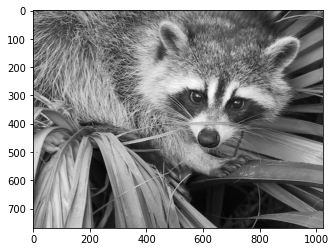

In [8]:
# Load image
A = misc.face(gray=True)

plt.imshow(A, cmap=plt.cm.gray)

In [9]:
### TODO: Función que recibe una imagen A y devuelve la imagen comprimida
### Tiene como entrada A y el número de componentes para realizar la reducción de dimensionalidad
### Devuelve la imagen comprimidad, el error de reconstrucción y el ratio de compresión

### Hint: Usa las funciones anteriormente construidas
### TU RESPUESTA ABAJO

def image_compression(A, n_components):
    U, S, Vt = svm(A)
    A_hat_reconstructed = U[:, 0:n_components]\
            .dot(S[:n_components, :n_components])\
            .dot(Vt[:n_components, :])
    sse = sse_score(A, A_hat_reconstructed)
    comp_ratio = (A.shape[1]*n_components + n_components + A.shape[0]*n_components)/(A.shape[1] * A.shape[0])
    return (A_hat_reconstructed, sse, comp_ratio)

A_hat, sse, comp_ratio = image_compression(A, n_components=50)

Grafica la imagen original `X` y la imagen reconstruida `X_hat`, y imprime el error de reconstrucción `sse` y el `ratio de compresion`.

Reconstruction Error: 195489946.2101702
Ratio de compresión: 0.11399586995442708


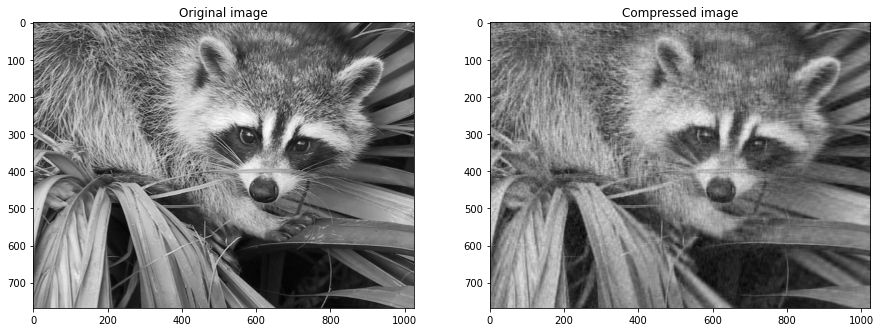

In [10]:
print(f"Reconstruction Error: {sse}")
print(f"Ratio de compresión: {comp_ratio}")

plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(A, cmap=plt.cm.gray)
plt.title('Original image')
plt.subplot(122)
plt.imshow(A_hat, cmap=plt.cm.gray)
plt.title('Compressed image')
plt.show()

## 3. Linear Regression - Least Squares

Este ejercicio pondrá a prueba tu habilidad para programar tu propia versión de mínimos cuadrados en Python.

**Objetivos**:
- Usar `Python` + `Pandas` para leer y analizar los datos.
- Asegurar los fundamentos matemáticos detrás del método de los mínimos cuadrados.

**Problema**: Usando datos sobre el precio de la vivienda, intentaremos predecir el precio de una casa en base a la superficie habitable con un modelo de regresión.

**Datos:** [Kaggle's House Prices Dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

### Repaso

Usaremos la versión matricial de la solución de los **métodos de los mínimos cuadrados** para resolver este problema. Como recordatorio, expresamos los coeficientes $w_{LS}$ como un vector, y calculamos ese vector en base a la matriz de entrada $X$ y en base a $y$.<br><br>



Como mostramos en clase, la matriz $X$ siempre contiene un vector de valores $1$ en la primera columna. En otras palabras:<br><br>

<center>$
X = \begin{bmatrix}
1 \  x_{11}  \\
1 \  x_{21}  \\
\vdots \ \vdots \\
1 \ x_{n1}
\end{bmatrix} 
$</center>

Para dos variables, $X$ tomará esta forma:
 
<center>$
X = \begin{bmatrix}
1 \  x_{11} \  x_{12} \\
1 \  x_{21} \  x_{22} \\
\vdots \ \vdots \\
1 \ x_{n1} \  x_{n2}
\end{bmatrix} 
$</center>

### Exploratorio de datos

In [11]:
!pip install pandas

You should consider upgrading via the 'C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [12]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [13]:
### Leer los datos
tr_path = './data/train.csv'
data = pd.read_csv(tr_path)

In [14]:
### La función .head() muestras las primeras lineas de los datos
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
### Lista con los nombres de las columnas
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [16]:
### TODO: Numero de columnas 
### Asignar el numero de columnas (int variable) a ans1
### TU RESPUESTA ABAJO

ans1 = len(data.columns)

#### Visualizaciones

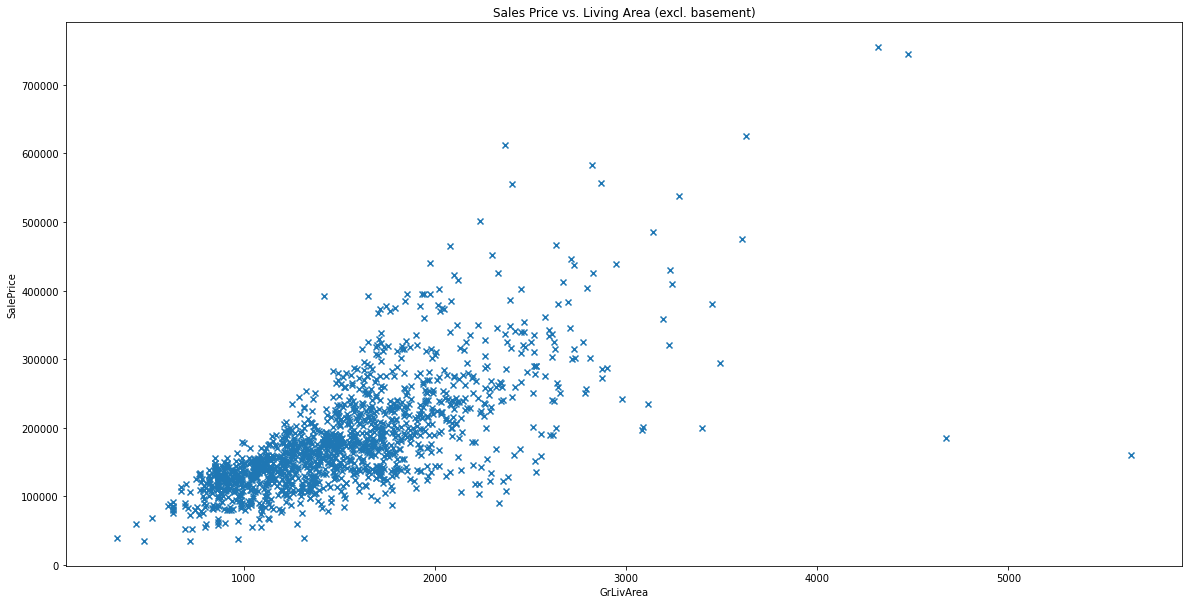

In [17]:
### Podemos graficar los datos price vs living area - Matplotlib

Y = data['SalePrice']
X = data['GrLivArea']

plt.scatter(X, Y, marker = "x")

### Anotaciones
plt.title("Sales Price vs. Living Area (excl. basement)")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice");

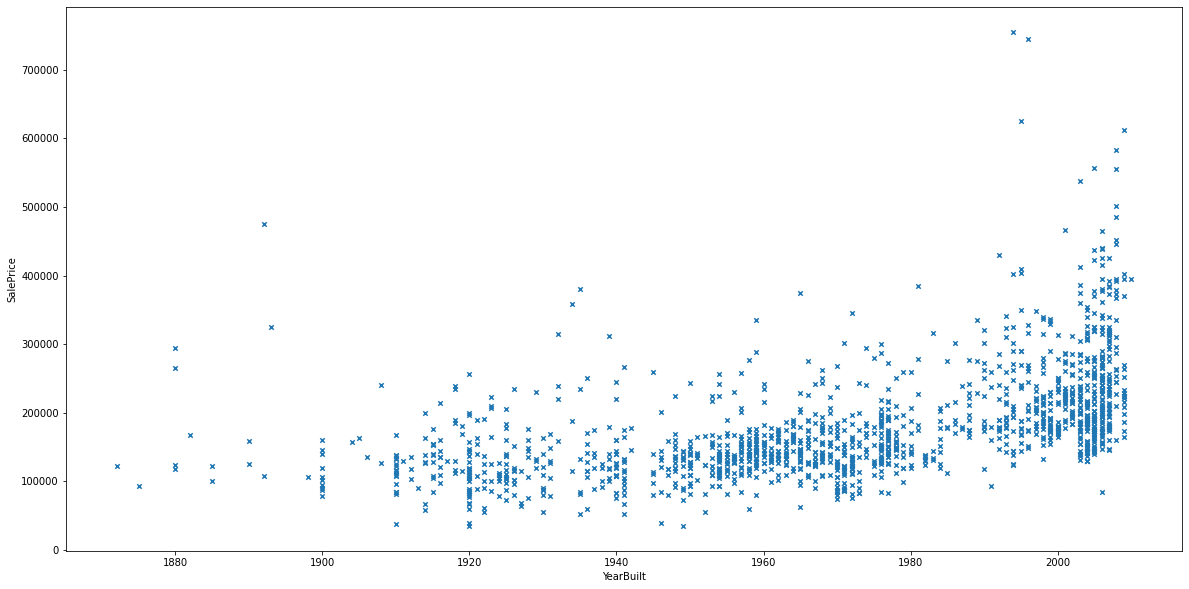

In [18]:
### price vs year - Pandas

data.plot('YearBuilt', 'SalePrice', kind = 'scatter', marker = 'x');

### Regresión Lineal

Ya que conocemos la ecuación para $w_{LS}$ tenemos todo lo necesario para resolver la regresión lineal. Vamos allá!<br><br>

<center>$w_{LS} = (X^T X)^{-1}X^T y,$</center>


In [19]:
### TODO: Función para invertir una matriz
### Contruye una función que toma como input una matriz
### Devuelve la inversa de dicha matriz
### TU RESPUESTA ABAJO

def inverse_of_matrix(mat):
    the_inverse = np.linalg.inv(mat)
    return the_inverse

sample_matrix = [[1, 2], [3, 4]]
the_inverse = inverse_of_matrix(sample_matrix)
print(the_inverse)

[[-2.   1. ]
 [ 1.5 -0.5]]


#### Leer los datos

Lo primero que debemos hacer es leer los datos, para ello construye una función que reciba el directorio de un archivo .csv `file_path` y lo lea usando `pandas`, la función debe devolver el dataframe.

In [20]:
### TODO: Función para leer un .csv
### La función recibe un file_path y debe devolver el dataframe
### TU RESPUESTA ABAJO

import pandas as pd

def read_to_df(file_path):
    data_frame = pd.read_csv(file_path)
    return data_frame

#### Subset del dataframe por columnas

Queremos construir una función que nos permita obtener los datos de ciertas columnas. Por ello, le pasaremos como argumento un `dataframe` y una lista con los nombres de las columnas que queremos extraer `column_names` y nos devolverá un dataframe con solo esas columnas.

In [21]:
### TODO: Función para extraer los datos de ciertas columnas
### Como argumentos, recibe un dataframe `data_frame`y una lista con los nombres de las columnas `column_names`
### Devuelve un dataframe con solo las columnas que le hemos especificado
### TU RESPUESTA ABAJO

def select_columns(data_frame, column_names):
    sub_df=data_frame[column_names]
    return sub_df

data = read_to_df('./data/train.csv')
selected_columns = ['SalePrice', 'GrLivArea', 'YearBuilt']
sub_df = select_columns(data, selected_columns)
sub_df.head()

,SalePrice,GrLivArea,YearBuilt
0,208500,1710,2003
1,181500,1262,1976
2,223500,1786,2001
3,140000,1717,1915
4,250000,2198,2000


#### Subset del dataframe por valores

El siguiente paso es construir una función que recibe un `data_frame`, el nombre de una columna, un valor mínimo y un valor máximo `cutoffs`. Nos devuelve un dataframe excluyendo las filas donde el valor de la columna indica está fuera de los valores mínimos y máximos que le hemos indicado.

In [22]:
### TODO: Función para crear un nuevo subset en base a valores
### Como argumento recibe un dataframe y una lista de tuples
### Tuples: (column_name, min_value, max_value)
### Devuelve un dataframe que excluye las filas donde los valores, en la columna que le hemos indicado, exceden los valores
### que le hemos indicado
### No eliminar la fila si los valores son iguales al min/max valor
### TU RESPUESTA ABAJO

def column_cutoff(data_frame, cutoffs):
    selected_data = data_frame[(data_frame[cutoffs[0][0]]>=cutoffs[0][1]) 
                               & (data_frame[cutoffs[0][0]]<=cutoffs[0][2]) 
                               & (data_frame[cutoffs[1][0]]>=cutoffs[1][1]) 
                               & (data_frame[cutoffs[1][0]]<=cutoffs[1][2])]
    return selected_data
data = read_to_df('./data/train.csv')
cutoffs = [('SalePrice', 50000, 1e10), ('GrLivArea', 0, 4000)]
selected_data = column_cutoff(data, cutoffs)
selected_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


#### Mínimos Cuadrados / Least Squares

Ahora, implementarás la ecuación $w_{LS}$:

<center>$w_{LS} = (X^T X)^{−1}X^T y,$</center>

In [23]:
### TODO: Función para resolver la ecuación wLS
### Toma como argumentos dos matrices, una para X y otra para y
### Asumimos que las matrices tienen las dimensiones correctas

### Paso 1: Asegurate que n > d. 
### Es decir, que el número de observaciones es mayor que el número de dimensiones.
### O lo que es lo mismo, que el número de filas de cada matriz sea mayor que el número de columnas
### Si no es así, debes transponer las matrices

### Paso 2: Debes añadir a la matriz X un vector columna del tamaño (n x 1)

### Paso 3: Usa la ecuación de arriba para obtener wLS

### TU RESPUESTA ABAJO


def least_squares_weights(input_x, target_y):
    if input_x.shape[0]<input_x.shape[1]:
        input_x=np.transpose(input_x)
    if target_y.shape[0]<target_y.shape[1]:
        target_y=np.transpose(target_y)
    x=np.append(np.ones((input_x.shape[0],1)),input_x,1)
    transpuesta_x = np.transpose(x)
    inversa=inverse_of_matrix(np.dot(transpuesta_x,x))
    weights=np.dot(np.dot(inversa, transpuesta_x),target_y)
    return weights
import numpy as np

training_y = np.array([[208500, 181500, 223500, 
                        140000, 250000, 143000, 
                        307000, 200000, 129900, 
                        118000]])
training_x = np.array([[1710, 1262, 1786, 
                        1717, 2198, 1362, 
                        1694, 2090, 1774, 
                        1077], 
                       [2003, 1976, 2001, 
                        1915, 2000, 1993, 
                        2004, 1973, 1931, 
                        1939]])
weights = least_squares_weights(training_x, training_y)

print(weights)

[[-2.29223802e+06]
 [ 5.92536529e+01]
 [ 1.20780450e+03]]


#### Testing en datos reales

Ahora que ya hemos programado todas las funciones necesarias para calcular la regresión lineal vamos a aplicar al conjunto de datos que habíamos seleccionado al principio. 

**Datos:** [Kaggle's House Prices Dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

Si tus funciones están correctamente programadas, la siguiente celda correrá sin problemas 😃

In [24]:
test_path = './data/train.csv'
df = read_to_df(test_path)
df_sub = select_columns(df, ['SalePrice', 'GrLivArea', 'YearBuilt'])

cutoffs = [('SalePrice', 50000, 1e10), ('GrLivArea', 0, 4000)]
df_sub_cutoff = column_cutoff(df_sub, cutoffs)

X = df_sub_cutoff['GrLivArea'].values
Y = df_sub_cutoff['SalePrice'].values

### reshaping for input into function
training_y = np.array([Y])
training_x = np.array([X])

weights = least_squares_weights(training_x, training_y)
print(weights)

[[13454.06670576]
 [  110.78992341]]


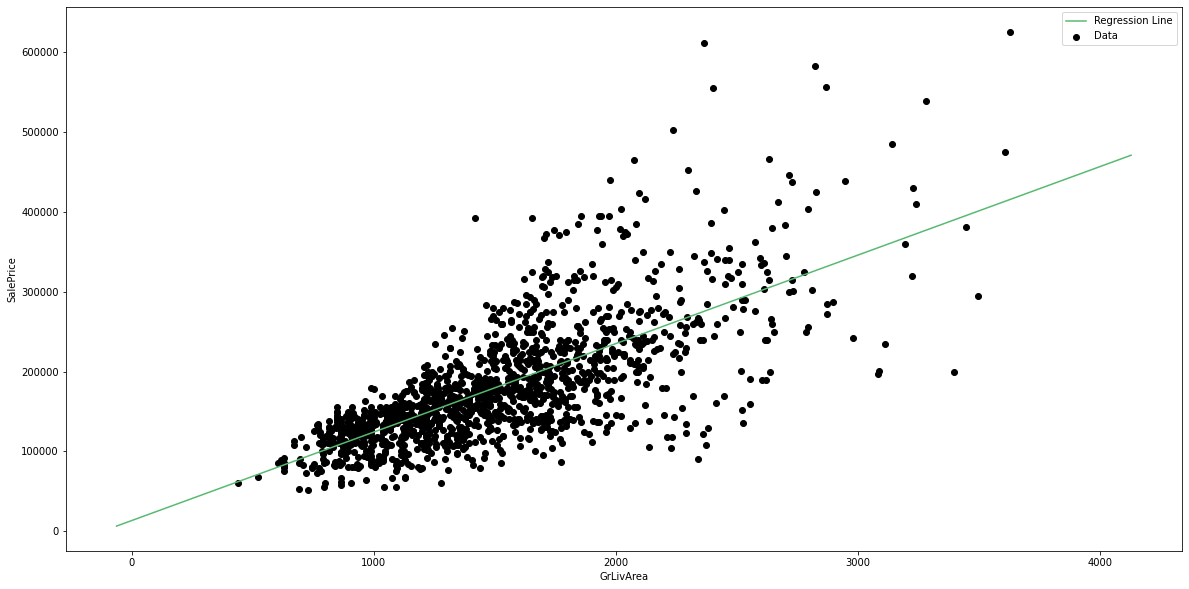

In [25]:
max_X = np.max(X) + 500
min_X = np.min(X) - 500

### Choose points evenly spaced between min_x in max_x
reg_x = np.linspace(min_X, max_X, 1000)

### Use the equation for our line to calculate y values
reg_y = weights[0][0] + weights[1][0] * reg_x

plt.plot(reg_x, reg_y, color='#58b970', label='Regression Line')
plt.scatter(X, Y, c='k', label='Data')

plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend()
plt.show()

#### Implementación con sklearn

Podemos comprobar como el resultado de nuestro código es exactamente igual al resultado de `sklearn`. Enhorabuena! Has programado tu propia **regresión lineal!!** 😃

In [26]:
!pip install sklearn

You should consider upgrading via the 'C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [27]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

### SKLearn requiere un array 2-dimensional X y 1 dimensional y.
### skl_X = (n,1); skl_Y = (n,)
skl_X = df_sub_cutoff[['GrLivArea']]
skl_Y = df_sub_cutoff['SalePrice']

lr.fit(skl_X,skl_Y)
print("Intercept:", lr.intercept_)
print("Coefficient:", lr.coef_)

Intercept: 13454.066705758683
Coefficient: [110.78992341]


## 4. Linear Regression - Gradient Descent

En este ejercicio resolveras el mismo problema anterior pero usando **Gradient Descent**

**Objetivos**:
- Asegurar los fundamentos matemáticos detrás del Gradient Descent.

**Problema**: Usando datos sobre el precio de la vivienda, intentaremos predecir el precio de una casa en base a la superficie habitable con un modelo de regresión.

**Datos:** [Kaggle's House Prices Dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

**Repaso:**

$$ RSS(w) = \sum_{n=1}^{N}[y_n-f(x_n)]^2 =  \sum_{n=1}^{N}[y_n- (w_0 + \sum_{d=1}^{D}w_dx_{nd}) ]^2 .$$

Loss function:

$$ RSS(w) = \frac{1}{2}\sum_{n=1}^{N}[y_n-f(x_n)]^2$$

Y lo que queremos es minimizar esta distancia, para que el modelo se acerque lo máximo posible a los valores verdaderos.

$$\nabla RSS(w) = X^T(Xw^t-y)$$

En resumen, el gradient descendiente para una regresión lineal, se basa en resolver esta ecuación de forma iterativa:

$$w^{t+1} = w^t - \eta * \nabla RSS(w)$$

#### Leer Datos

In [28]:
import pandas as pd
import numpy as np

# Leer datos
data = pd.read_csv('./data/train.csv')

# Extraer dichas columnas
newData = data[['GrLivArea','SalePrice']]
print(newData.head())

# Contruir x - y
x = newData['GrLivArea']
y = newData['SalePrice']

# Standarizar los datos
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x] 

print("Shape of X: ", x.shape)
print("Shape of y:", y.shape)

   GrLivArea  SalePrice
0       1710     208500
1       1262     181500
2       1786     223500
3       1717     140000
4       2198     250000
Shape of X:  (1460, 2)
Shape of y: (1460,)


#### Gradient Descent

In [29]:
### TODO: Función para encontrar los valores w usando Gradient Descent
### Toma como argumentos: X, y, w, n_iterations, eta
### Completa la función añadiendo la loss función y la updating rule
### TU RESPUESTA ABAJO

def gradient_descent(x, y, w, iterations, eta):
    past_loss = []
    past_w = [w]
    n = y.size
    for i in range(iterations):
        prediction = np.dot(x, w)
        error = prediction - y
        
        # TODO: Define Loss function
        #=============
        loss = (1/2)*sum((error)**2)
        #=============
        past_loss.append(loss)
        
        GradRss = np.dot(x.T, error)
        
        # TODO: Define updating rule
        #=============
        w -= eta * np.dot(np.transpose(x),np.dot(x,np.transpose(w))-y)
        #=============
        past_w.append(w)
        
    return past_w, past_loss

import numpy as np

# Learning rate
eta = 0.01 

# Número de iteraciones
iterations = 2000 #No. of iterations

# Seed para inicializar w
np.random.seed(123)
w0 = np.random.rand(2)

training_y = np.array([208500, 181500, 223500, 
                        140000, 250000])
training_x = np.array([[ 1.        ,  0.37020659],
                       [ 1.        , -0.48234664],
                       [ 1.        ,  0.51483616],
                       [ 1.        ,  0.38352774],
                       [ 1.        ,  1.29888065]])

weights, loss = gradient_descent(training_x, training_y, w0, iterations, eta)

print(weights[-1])

[183845.82320222  40415.66453324]


Una vez construida nuestra función para el Gradient Descent podemos usarla para encontrar los valores optimos de $w$. **Prueba a modificar el learning rate para ver la convergencia del Gradient Descent.**

In [46]:
import numpy as np

# Learning rate
eta = 0.32

# Número de iteraciones
iterations = 2000 #No. of iterations

# Seed para inicializar w
np.random.seed(123)
w0 = np.random.rand(2)

weights, loss = gradient_descent(training_x, training_y, w0, iterations, eta)

print(weights[-1])

[183845.82320235  40415.66453301]


Hemos creado la siguiente función para ver como Gradient Descent encuentra el resultado final - **Tarda un poco**

In [47]:
!pip install matplotlib

You should consider upgrading via the 'C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


MovieWriter imagemagick unavailable; using Pillow instead.



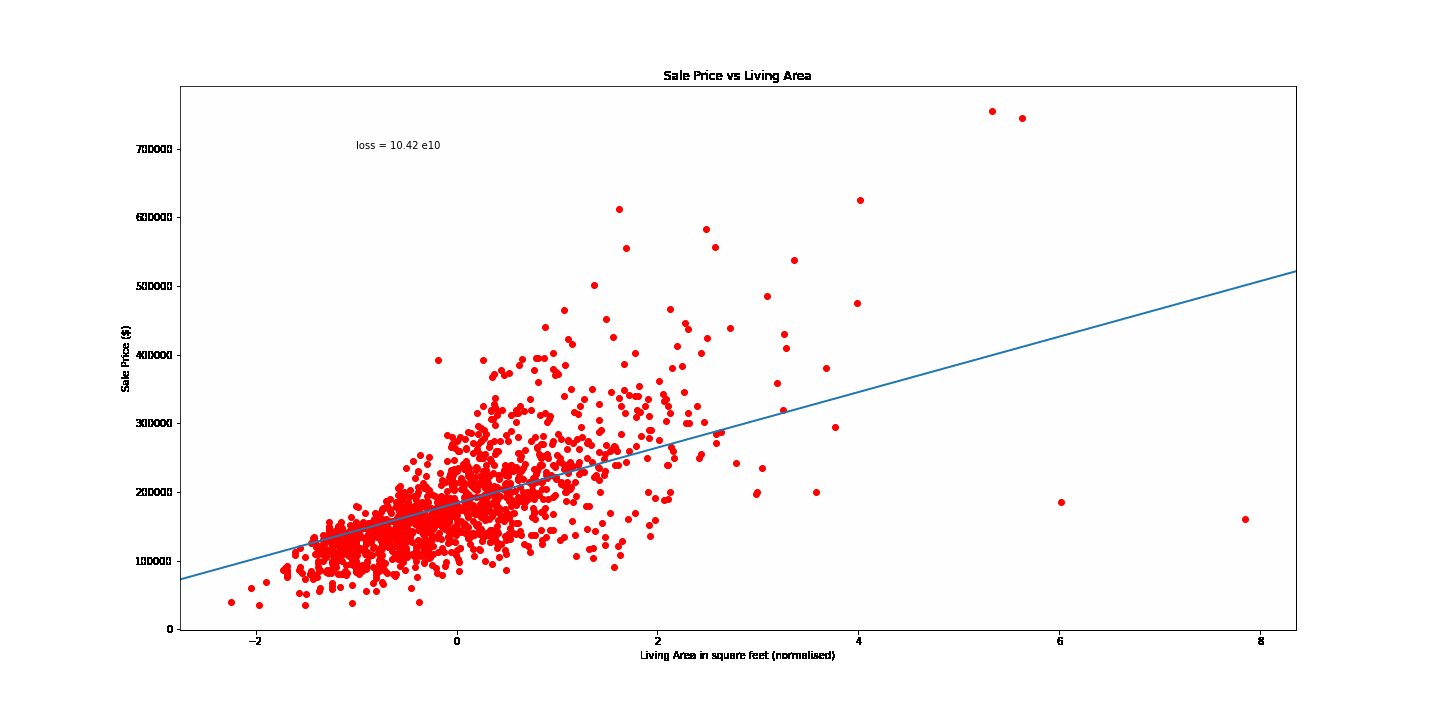

In [48]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Definir figure
fig = plt.figure()
ax = plt.axes()
plt.title('Sale Price vs Living Area')
plt.xlabel('Living Area in square feet (normalised)')
plt.ylabel('Sale Price ($)')
plt.scatter(x[:,1], y, color='red')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
plt.close()

# Generar animacion de los datos
def init():
    line.set_data([], [])
    annotation.set_text('')
    return line, annotation

# Función para la animación
def animate(i):
    x = np.linspace(-5, 20, 1000)
    y = weights[i][1]*x + weights[i][0]
    line.set_data(x, y)
    annotation.set_text('loss = %.2f e10' % (loss[i]/10000000000))
    return line, annotation

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=300, interval=0, blit=True)

anim.save('animation.gif', writer='imagemagick', fps = 30)

# Visualizar la animación
import io
import base64
from IPython.display import HTML

filename = 'animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

## (Opcional) - Calculando similitud entre páginas web

Este ejercicio pondrá a prueba tu capacidad para encontrar la similitud entre vectores usando cosine similarity.

**Objetivos**:
- Usar `Python` + `BeautifulSoup` para "scrapear" páginas webs.
- Asegurar los fundamentos matemáticos detrás del cosine similarity.

**Problema**: Dadas N páginas web, extraer el texto de ellas y determinar la similitud.

### Repaso

Como recordarás, podemos medir la similitud entre vectores usando la siguiente ecuación:<br>

<center>$\overrightarrow{u} \cdot \overrightarrow{v} = |\overrightarrow{u}||\overrightarrow{v}| \cos \theta $</center>

Que podemos reescribir de la siguiente forma:<br>

<center>$\cos \theta = \frac{\overrightarrow{u} \cdot \overrightarrow{v}}{|\overrightarrow{u}||\overrightarrow{v}|}$</center>

La **similitud** va a venir dada por el ángulo $\theta$, que nos indicará lo siguiente:

<img src="./Images/cosine_sim.png" width=70%/>

### Web scraping

La técnica llamada `web scraping` es la utilizada normalmente para extraer contenido de páginas webs y posteriormente procesarlos. Por ejemplo, si quisieramos construir una base de datos para entrenar un modelo con imágenes de ropa para hombres, podríamos intentar "scrapear" dicha sección de la página web del El Corte Inglés para conseguir las imágenes (no es tan fácil como suena).

In [49]:
# Estas librerias deben ser instaladas para hacer este ejercicio
!pip install beautifulsoup4
!pip install lxml

You should consider upgrading via the 'C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [50]:
import re
import lxml
from bs4 import BeautifulSoup
import urllib
import urllib.request

url = "https://es.wikipedia.org/wiki/Canis_lupus_familiaris"

def parse_from_url(url):
    """
    Función para extraer el contenido (raw text) de una página web
    """
    
    html = urllib.request.urlopen(url).read()
    soup = BeautifulSoup(html, "html.parser" )
    for script in soup(["script", "style"]):
        script.extract()
        
    text = soup.get_text()
    
    # Eliminar saltos de linea
    text = re.sub('\s+', ' ', text)
    return text

parse_from_url(url)

' Canis familiaris - Wikipedia, la enciclopedia libre Canis familiaris De Wikipedia, la enciclopedia libre (Redirigido desde «Canis lupus familiaris») Ir a la navegación Ir a la búsqueda «Perro» redirige aquí. Para otras acepciones, véase Perro (desambiguación). Perro Estado de conservación DomesticadoTaxonomíaReino: AnimaliaFilo: ChordataSubfilo: VertebrataClase: MammaliaOrden: CarnivoraSuborden: CaniformiaFamilia: CanidaeSubfamilia: CaninaeTribu: CaniniSubtribu: CaninaGénero: CanisEspecie: C. familiarisLinnaeus, 1758Distribución Sinonimia Canis familiaris Linnaeus 1758 Canis familiaris domesticus Linnaeus 1758 Canis lupus familiaris Linnaeus 1758 [editar datos en Wikidata] El perro (Canis familiaris o Canis lupus familiaris, dependiendo de si se lo considera una especie por derecho propio o una subespecie del lobo),[1]\u200b[2]\u200b[3]\u200b llamado perro doméstico o can,[4]\u200b y en algunos lugares coloquialmente llamado chucho,[5]\u200b tuso,[6]\u200b choco,[7]\u200b entre otros

In [51]:
### TODO: Escribe una función que reciba una lista de urls
### Aplica web scraping a cada una de ellas para extraer el contenido
### Y devuelva un diccionario con el contenido por cada url

### HINT: Usa la función anterior
### NOTE: Suele tardar un poco en extraer el contenido de las paginas web
### TU RESPUESTA ABAJO

def get_content(url_ls):
    contenido={}
    for url in url_ls:
        contenido[url]=parse_from_url(url)
    return contenido

url_ls = ['https://es.wikipedia.org/wiki/Canis_lupus_familiaris', 
        'https://es.wikipedia.org/wiki/Canis_lupus',
        'https://es.wikipedia.org/wiki/Felis_silvestris_catus']
        
url2content = get_content(url_ls)  
print(url2content)

{'https://es.wikipedia.org/wiki/Canis_lupus_familiaris': ' Canis familiaris - Wikipedia, la enciclopedia libre Canis familiaris De Wikipedia, la enciclopedia libre (Redirigido desde «Canis lupus familiaris») Ir a la navegación Ir a la búsqueda «Perro» redirige aquí. Para otras acepciones, véase Perro (desambiguación). Perro Estado de conservación DomesticadoTaxonomíaReino: AnimaliaFilo: ChordataSubfilo: VertebrataClase: MammaliaOrden: CarnivoraSuborden: CaniformiaFamilia: CanidaeSubfamilia: CaninaeTribu: CaniniSubtribu: CaninaGénero: CanisEspecie: C. familiarisLinnaeus, 1758Distribución Sinonimia Canis familiaris Linnaeus 1758 Canis familiaris domesticus Linnaeus 1758 Canis lupus familiaris Linnaeus 1758 [editar datos en Wikidata] El perro (Canis familiaris o Canis lupus familiaris, dependiendo de si se lo considera una especie por derecho propio o una subespecie del lobo),[1]\u200b[2]\u200b[3]\u200b llamado perro doméstico o can,[4]\u200b y en algunos lugares coloquialmente llamado ch

### Preprocesado

Como es lógico, no podemos resolver esta ecuación $\cos \theta = \frac{\overrightarrow{u} \cdot \overrightarrow{v}}{|\overrightarrow{u}||\overrightarrow{v}|}$ usando texto sin más, debemos convertir cada página web a un vector.

In [52]:
### TODO: Escribe una función que reciba texto
### Y devuelva una lista con el texto separado por espacios
### Además del set de la lista
### "hola que que tal" - ["hola", "que", "que", "tal"], {"hola", "que", "tal"}
### TU RESPUESTA ABAJO

def tokenizer(text):
    tokens_txt=text.split()
    set_txt = set(tokens_txt)
    return (tokens_txt, set_txt)

url_ls = "Hola me llamo llamo Alex y estamos aprendiendo Algebra y estamos bien"
tokens_txt, set_txt = tokenizer(url_ls)  
print(tokens_txt, set_txt)

['Hola', 'me', 'llamo', 'llamo', 'Alex', 'y', 'estamos', 'aprendiendo', 'Algebra', 'y', 'estamos', 'bien'] {'llamo', 'Algebra', 'aprendiendo', 'me', 'Hola', 'bien', 'Alex', 'estamos', 'y'}


El siguiente paso es crear un conjunto con las palabras de ambas páginas web (unión), por ejemplo:

- Los perros son maravillosos...
- Los maravillosos años 80...

Por tanto, el conjunto para estas dos frases sería `{"los", "perros", "son", "maravillosos", "años", "80"}`. Debemos realizar esto para todas las combinaciones posibles, es decir:

- web_1
- web_2
- web_3

En este caso, las combinaciones serían (no importa el orden) `[web_1, web_2]`, `[web_1, web_3]`, `[web_2, web_3]`

In [53]:
### TODO: Escribe una función que recibe una lista de N páginas web
### Y calcula todas las combinaciones posibles entre ellas, no importa el orden
### [web_1, web_2, web_3, ...]
### Devuelve una lista de tuples con las combinaciones [(web_1, web_2), (web_1, web_3), ...]

# HINT: Puedes implementar esta función como quieras pero la librería itertools 
#       proporciona una función llamada `combinations` para realizar esta tarea.

### TU RESPUESTA ABAJO
import itertools
    
def combinations(url_ls):
    combinaciones = list(itertools.combinations(url_ls, 2))
    return combinaciones

url_ls = ['https://es.wikipedia.org/wiki/Canis_lupus_familiaris', 
        'https://es.wikipedia.org/wiki/Canis_lupus',
        'https://es.wikipedia.org/wiki/Felis_silvestris_catus']
permutation = combinations(url_ls)
print(permutation)

[('https://es.wikipedia.org/wiki/Canis_lupus_familiaris', 'https://es.wikipedia.org/wiki/Canis_lupus'), ('https://es.wikipedia.org/wiki/Canis_lupus_familiaris', 'https://es.wikipedia.org/wiki/Felis_silvestris_catus'), ('https://es.wikipedia.org/wiki/Canis_lupus', 'https://es.wikipedia.org/wiki/Felis_silvestris_catus')]


In [54]:
### TODO: Escribe una función que recibe una lista con tuples
### [({'que', 'hola'}, {'que', 'es', 'guay'}), ({'que', 'hola'}, {'madrid', 'la', 'es'})]
### Y devuelve una lista con la union de los conjuntos
### [({'que', 'hola', 'es', 'guay'}), ({'que', 'hola', 'madrid', 'la', 'es'})]
### TU RESPUESTA ABAJO

def union(comb_ls):
    union = []
    for tuple in comb_ls:
        union.append(set( tuple[0].union(tuple[1])))
    return union

comb_ls = [({'que', 'hola'}, {'que', 'es', 'guay'}), ({'que', 'hola'}, {'madrid', 'la', 'es'})]        
union_ls = union(comb_ls)  
print(union_ls)

[{'hola', 'es', 'que', 'guay'}, {'es', 'que', 'hola', 'madrid', 'la'}]


Una vez que tenemos una lista de conjuntos por cada par de páginas web, podemos convertir el texto de la página web a un vector.

In [55]:
def set2vector(tokens_web1, tokens_web_2, set_web1, set_web2):
    # Unimos los conjuntos
    join_set = union([(set_web1, set_web2)])[0]
    
    web1_array = []
    web2_array = [] 

    for word in join_set:
        if word in tokens_web1:
            web1_array.append(1)
        else:
            web1_array.append(0)
        if word in tokens_web_2:
            web2_array.append(1)
        else:
            web2_array.append(0)

    return np.array(web1_array), np.array(web2_array)

tokens_web1 = ["hola", "que", "tal", "soy", "Alex"]
tokens_web_2 = ["hola", "me", "llamo"]
set_web1 = {"hola", "que", "tal", "soy", "Alex"}
set_web2 = {"hola", "me", "llamo"}
web1_array, web2_array = set2vector(tokens_web1, tokens_web_2, set_web1, set_web2)
print(web1_array, web2_array)

[1 1 0 1 1 1 0] [0 0 1 0 1 0 1]


### Cosine Similarity

Por último, ya podemos implementar la ecuación: $\cos \theta = \frac{\overrightarrow{u} \cdot \overrightarrow{v}}{|\overrightarrow{u}||\overrightarrow{v}|}$

In [56]:
### TODO: Escribe una función que recibe dos vectores, u y v
### Y devuelva la similaridad entre ambos vectores
###
### Paso 1: Si u y v son listas -> Convertirlo a arrays
###
### Paso 2: Calcula la similaridad entre ambos vectores
### TU RESPUESTA ABAJO

import numpy as np

def cosine_similarity(u, v):
    prod = u@v
    norm_u = np.linalg.norm(u)
    norm_v = np.linalg.norm(v)
    similaridad = prod/(norm_u*norm_v)
    return similaridad

u = np.array([1, 2, 3])
v = np.array([3, 2, 1])     
similarity = cosine_similarity(u, v)
print(similarity)

0.7142857142857143


In [57]:
def websites_sim(url_ls):
    url2content = get_content(url_ls)
    
    # Creamos un diccionario donde cada url tendrá su contenido tokenizado y su conjunto
    url_dict = {}
    for url, content in url2content.items():
        toks, sets = tokenizer(content)
        url_dict[url] = {'tokens': toks,
                        'unique_tokens': sets}
    # Calculamos todas las combinaciones posibles de las direcciones de las páginas web
    comb_ls = combinations(url_ls)

    # Usando comb_ls y la función `set2vector()` convertimos cada página web a vectores
    print("Similaridad: ")
    for el in comb_ls:
        # Obtenemos los tokens y el conjunto para cada página web
        token_1 = url_dict[el[0]]['tokens']
        token_2 = url_dict[el[1]]['tokens']
        set_1 = url_dict[el[0]]['unique_tokens']
        set_2 = url_dict[el[1]]['unique_tokens']
        array_web1, array_web2 = set2vector(token_1, token_2, set_1, set_2)
        similarity = cosine_similarity(array_web1, array_web2)
        print("{} vs {} - {}".format(el[0], el[1], round(similarity, 3)))

                      
url_ls = ['https://es.wikipedia.org/wiki/Canis_lupus_familiaris', 
'https://es.wikipedia.org/wiki/Canis_lupus',
'https://es.wikipedia.org/wiki/Felis_silvestris_catus']

similarity_ls = websites_sim(url_ls) 

Similaridad: 
https://es.wikipedia.org/wiki/Canis_lupus_familiaris vs https://es.wikipedia.org/wiki/Canis_lupus - 0.278
https://es.wikipedia.org/wiki/Canis_lupus_familiaris vs https://es.wikipedia.org/wiki/Felis_silvestris_catus - 0.277
https://es.wikipedia.org/wiki/Canis_lupus vs https://es.wikipedia.org/wiki/Felis_silvestris_catus - 0.261
